In [1]:
# Modules: gdal/3.6.4  
# Environment base: /g/data/xe2/John/geospatenv

In [1]:
# Standard library
import os

# Local imports
os.chdir(os.path.join(os.path.expanduser('~'), "Projects/PaddockTS"))
from DAESIM_preprocess.util import gdata_dir, scratch_dir, visualise_tif_rioxarray, plot_time_series, plot_time_point
from DAESIM_preprocess.terrain_tiles import terrain_tiles
from DAESIM_preprocess.slga_soils import slga_soils, asris_urls
from DAESIM_preprocess.ozwald_yearly import ozwald_yearly_average
from DAESIM_preprocess.ozwald_8day import ozwald_8day, ozwald_8day_abbreviations
from DAESIM_preprocess.ozwald_daily import ozwald_daily, ozwald_daily_abbreviations
from DAESIM_preprocess.topography import pysheds_accumulation, catchment_gullies, catchment_ridges, calculate_slope, show_acc, show_aspect, show_slope, show_ridge_gullies

In [2]:
# Choosing location
lat, lon = -34.3890427, 148.469499
buffer = 0.005  # 0.01 degrees is about 1km in each direction, so 2km total
stub = "MILG_1km"
start_year = 2020
end_year = 2021

# Specify output destinations
outdir = os.path.join(gdata_dir, "Data/PadSeg/")
tmp_dir = os.path.join(scratch_dir, "tmp")

In [15]:
%%time
# Download elevation from terrain tiles
terrain_tiles(lat, lon, buffer, outdir, stub, tmp_dir)

Downloaded /scratch/xe2/cb8590/tmp/MILG_6km_terrain_original.tif
Saved /g/data/xe2/cb8590/Data/PadSeg/MILG_6km_terrain_cleaned.tif
CPU times: user 3.35 s, sys: 179 ms, total: 3.52 s
Wall time: 3.99 s


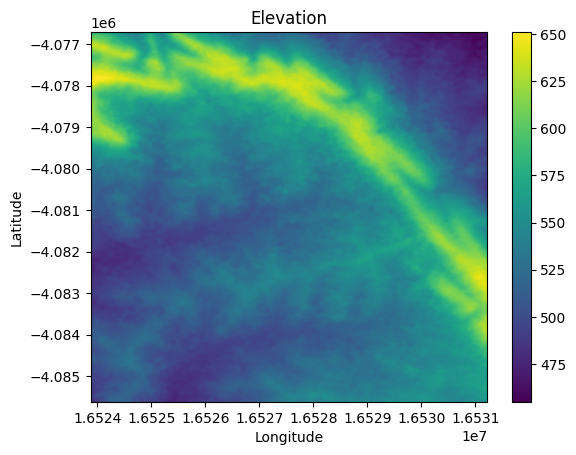

In [16]:
# Visualise elevation
visualise_tif_rioxarray('/g/data/xe2/cb8590/Data/PadSeg/MILG_6km_terrain_cleaned.tif', "Elevation")

In [6]:
%%time
# The CSIRO soils API seems to frequently be randomly unavailable
# variables = ['Clay', 'Silt', 'Sand', 'pH_CaCl2', 'Bulk_Density', 'Available_Water_Capacity', 'Effective_Cation_Exchange_Capacity', 'Total_Nitrogen', 'Total_Phosphorus']
variables = ['Clay', 'Sand']
slga_soils(variables, lat, lon, buffer, outdir, stub)

Downloaded /g/data/xe2/cb8590/Data/PadSeg/MILG_1km_Clay.tif
Downloaded /g/data/xe2/cb8590/Data/PadSeg/MILG_1km_Sand.tif
CPU times: user 85.4 ms, sys: 12.8 ms, total: 98.1 ms
Wall time: 5.96 s


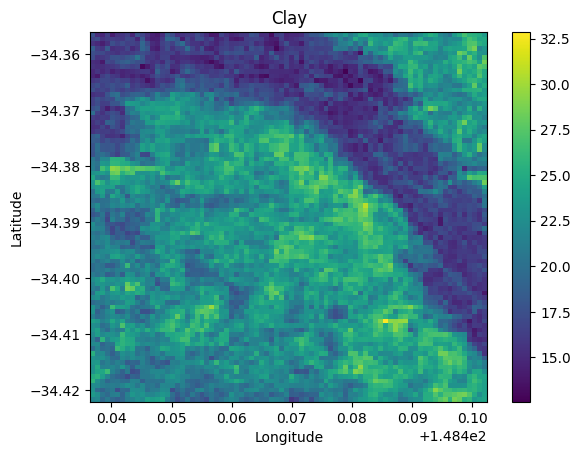

In [7]:
visualise_tif_rioxarray("/g/data/xe2/cb8590/Data/PadSeg/MILG_6km_Clay.tif", "Clay")

In [8]:
%%time
# Download average climate data from SILO hosted on OzWald
variables = ["Tmax", "Tmin", "Pg"]
ozwald_yearly_average(variables, lat, lon, buffer, start_year, end_year, outdir, stub, tmp_dir)

Saved: /g/data/xe2/cb8590/Data/PadSeg/MILG_1km_Maximum_Temperature_2020_2021_average.tif
Saved: /g/data/xe2/cb8590/Data/PadSeg/MILG_1km_Minimum_Temperature_2020_2021_average.tif
Saved: /g/data/xe2/cb8590/Data/PadSeg/MILG_1km_Annual_Rainfall_2020_2021_average.tif
CPU times: user 215 ms, sys: 70.7 ms, total: 286 ms
Wall time: 1.39 s


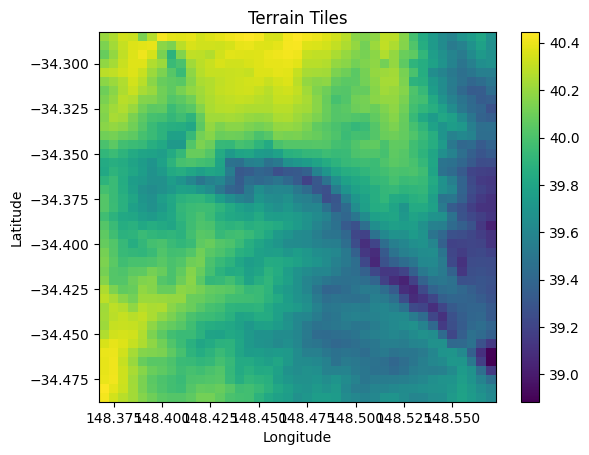

In [17]:
visualise_tif_rioxarray("/g/data/xe2/cb8590/Data/PadSeg/MILG_6km_Maximum_Temperature_2020_2021_average.tif", "Average Maximum Temperature")

In [3]:
variables = ozwald_8day_abbreviations.keys()
variables

dict_keys(['Alb', 'BS', 'EVI', 'FMC', 'GPP', 'LAI', 'NDVI', 'NPV', 'OW', 'PV', 'QTot', 'Ssoil'])

In [8]:
%%time
# Download modelled variables from OzWald
# variables = ["Ssoil", "GPP"] 
variables = ['SN', 'Ssoil']
ds = ozwald_8day(variables, lat, lon, buffer, start_year, end_year, outdir, stub, tmp_dir)

Downloaded /scratch/xe2/cb8590/tmp/MILG_1km_SN_2020.nc
Downloaded /scratch/xe2/cb8590/tmp/MILG_1km_SN_2021.nc
Downloaded /scratch/xe2/cb8590/tmp/MILG_1km_Ssoil_2020.nc
Downloaded /scratch/xe2/cb8590/tmp/MILG_1km_Ssoil_2021.nc
Saved: /g/data/xe2/cb8590/Data/PadSeg/MILG_1km_ozwald_8day.nc
CPU times: user 353 ms, sys: 117 ms, total: 470 ms
Wall time: 3.62 s


In [5]:
plot_time_series(ds, "Ssoil", lat, lon)

NameError: name 'ds' is not defined

In [ ]:
plot_time_point(ds, "Ssoil", "2020-03-10")

In [5]:
%%time
variables = ["VPeff", "Uavg"]
ds = ozwald_daily(variables, lat, lon, 0.1, start_year, end_year, outdir, "MILG_20km", tmp_dir)

Downloaded /scratch/xe2/cb8590/tmp/MILG_20km_VPeff_2020.nc
Downloaded /scratch/xe2/cb8590/tmp/MILG_20km_VPeff_2021.nc
Downloaded /scratch/xe2/cb8590/tmp/MILG_20km_Uavg_2020.nc
Downloaded /scratch/xe2/cb8590/tmp/MILG_20km_Uavg_2021.nc
Saved: /g/data/xe2/cb8590/Data/PadSeg/MILG_20km_ozwald_daily.nc
CPU times: user 120 ms, sys: 38.3 ms, total: 159 ms
Wall time: 1.02 s


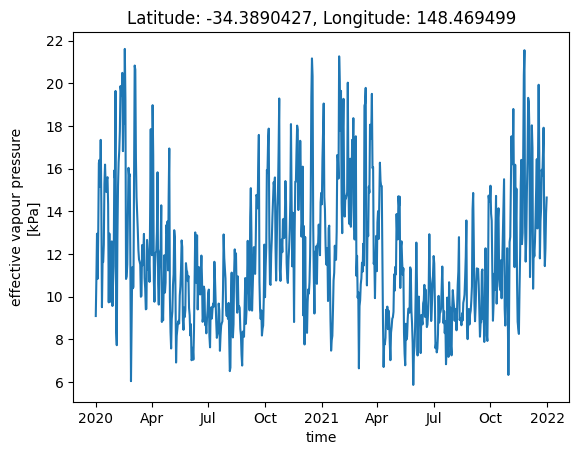

In [6]:
plot_time_series(ds, "VPeff", lat, lon)

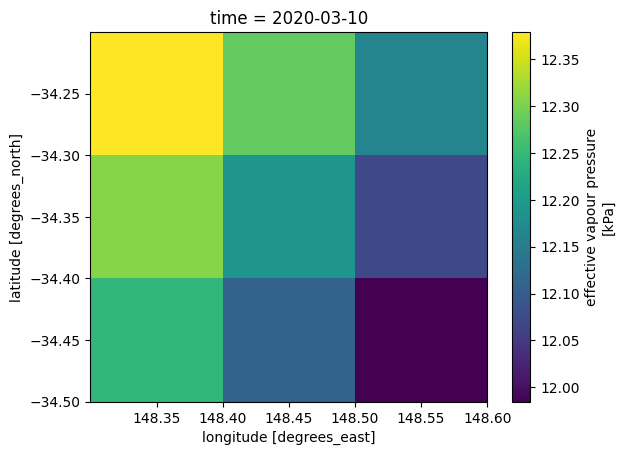

In [7]:
plot_time_point(ds, "VPeff", "2020-03-10")

In [2]:
%%time
filepath = "/g/data/xe2/cb8590/Data/PadSeg/MILG_6km_terrain_cleaned.tif"
grid, dem, fdir, acc = pysheds_accumulation(filepath)

CPU times: user 6.48 s, sys: 883 ms, total: 7.37 s
Wall time: 6.38 s


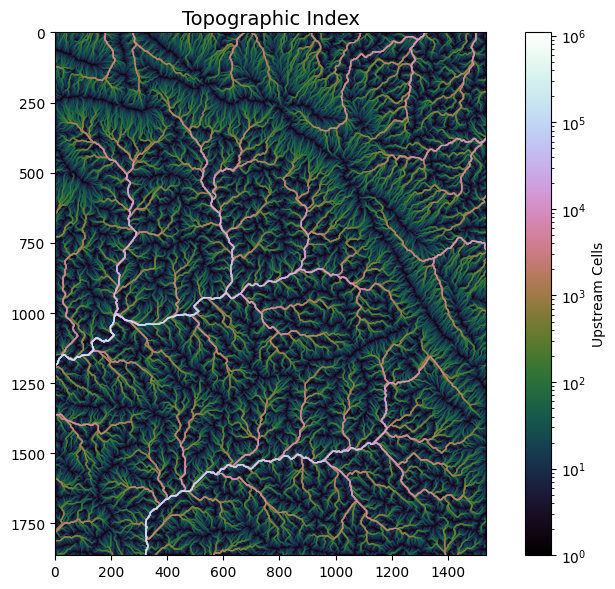

In [3]:
show_acc(acc)

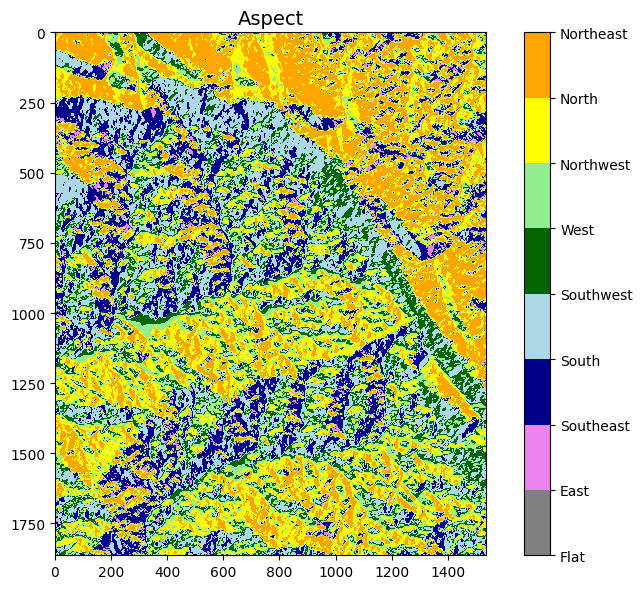

In [4]:
show_aspect(fdir)

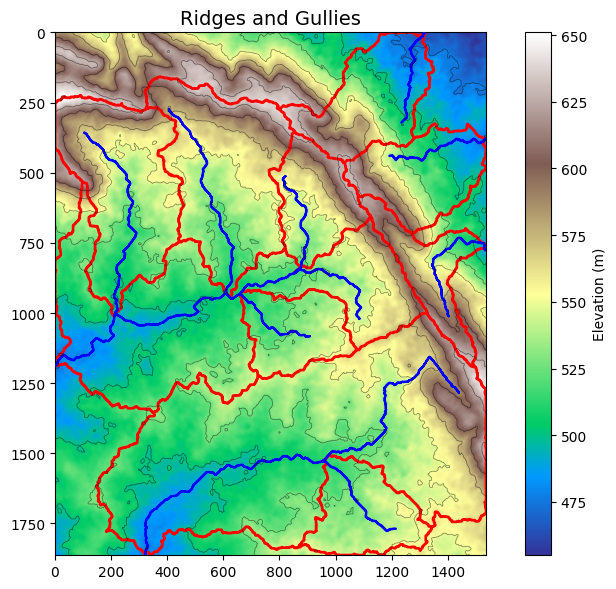

In [4]:
num_catchments = 10
gullies, full_branches = catchment_gullies(grid, fdir, acc, num_catchments)
ridges = catchment_ridges(grid, fdir, acc, full_branches)
show_ridge_gullies(dem, ridges, gullies)

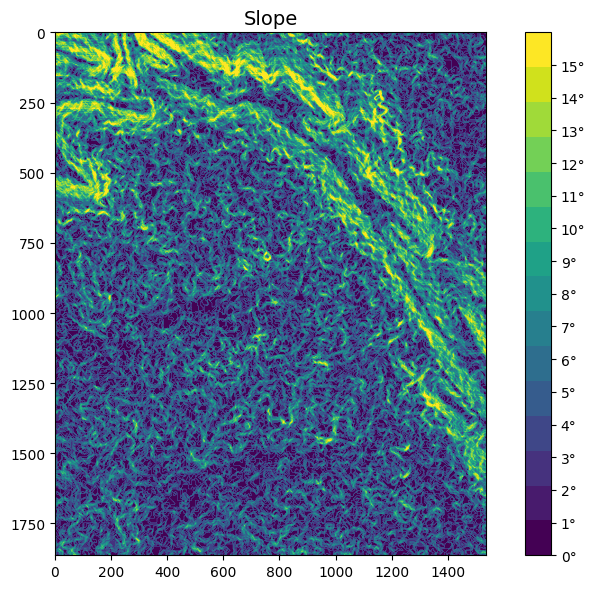

In [3]:
slope = calculate_slope(filepath)
show_slope(slope)